# Regiones con PCA

Intentemos ver si sale algo de aplicar PCA a la matriz de ocurrencias. Vamos a amasar primero los datos un poquito para quedarnos con aquellos con menor entropía...

In [1]:
%pylab inline

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [8]:
df = pd.read_csv("/home/jmperez/Downloads/cantidadesTotalesOrdenada.csv")

columnas_palabras = df.columns[1:24]
columnas_usuarios = df.columns[25:-1]


Calculamos entropía y cantidad de provincias que utilizan esta palabra

In [12]:
from scipy.stats import entropy

df["cantProvincias"] = (df[columnas_palabras] > 0).sum(axis=1)
df["entropy"] = df[columnas_palabras].apply(entropy, axis=1)

Acá me quedo sólo con las palabras que:

- sean usadas al menos 40 veces
- las usen dos o más provincias

Esto último es para sacar la mayor parte de los topónimos que no nos interesan (suelen estar agrupados en única provincia)

In [14]:
min_provincias = 2
umbral = 40

df_todo = df
df = df.loc[(df.cantPalabra > umbral) & (df.cantProvincias >= min_provincias)].copy()

Gráfico de la entropía en función de la posición en el DataFrame

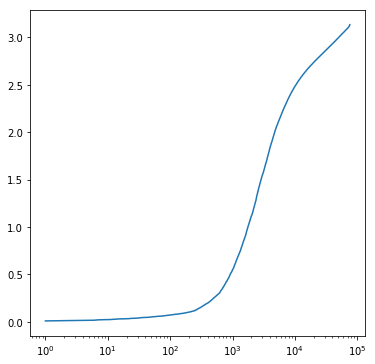

In [18]:
plt.rcParams['figure.figsize'] = (6, 6)


df.sort_values(by="entropy", ascending=True, inplace=True)

plt.semilogx(range(df.shape[0]), df.entropy);

Nos quedamos con algo < 5K, que es donde parece subir mucho la entropía.

Veamos cuántas provincias usan la palabra de las primeras 5000

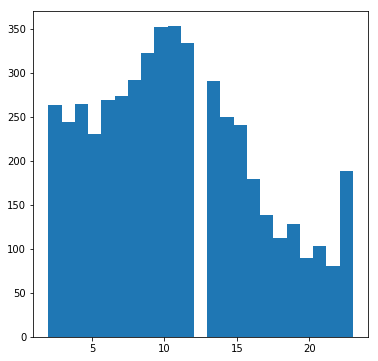

In [33]:
plt.rcParams['figure.figsize'] = (6, 6)
limite = 5* 10 ** 3
hist(df[:limite].cantProvincias, bins=23);

Apliquemos PCA para encontrar alguna suerte de región de uso de las palabras

In [34]:
from sklearn import decomposition

plt.rcParams['figure.figsize'] = (6, 6)

pca = decomposition.PCA(n_components=componentes)

X = df[:limite][cant_palabras].as_matrix()
print(X.shape)
pca.fit(X)


(5000, 23)


PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

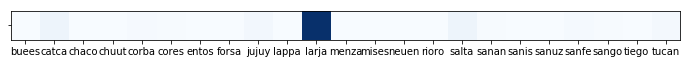

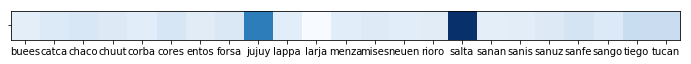

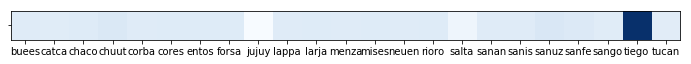

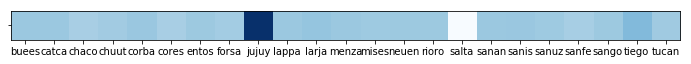

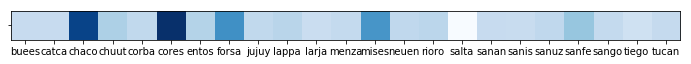

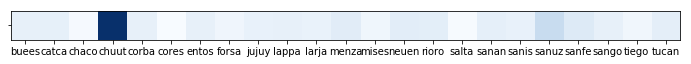

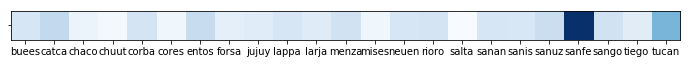

In [35]:
prov_labels = [x.split("P")[0] for x in cant_palabras]
prov_labels = [x[:3] + x[-2:] for x in prov_labels]

plt.rcParams['figure.figsize'] = (12, 15)
no_comp = len(pca.components_)

for i, component in enumerate(pca.components_):
    plt.subplot(no_comp, 1, i+1)
    
    plt.imshow(component.reshape(1, -1), cmap=plt.cm.Blues)
    plt.xticks(range(23), prov_labels)
    plt.yticks(range(1), [''])
    plt.show()
    

De acá lo que podemos ver (usando también los números de acá abajo):

1. Región "La Rioja" => será por los problemas que tenemos en los datos?
2. Jujuy + Salta, aportan un poco Tierra del Fuego (!) y Tucumán.
3. Tierra del Fuego. Desconozco razón
4. Jujuy y algo de Tierra del Fuego...
4. La más linda: Corrientes, Chaco, Formosa, Misiones, un poco de Santa Fé?
6. Chubut + Santa Cruz
7. Santa Fe, Tucumán, un poco de Catamarca, Entre Ríos, Santa Cruz y aún menos Santiago

In [36]:
for i, component in enumerate(pca.components_):
    print("="*40)
    print("componente {}\n\n".format(i+1))
    x = pd.Series(component, index=prov_labels)
    
    print(x.sort_values(ascending=False))
        

componente 1


larja    0.996671
salta    0.050993
catca    0.048658
jujuy    0.026724
tucan    0.017494
sanfe    0.013911
corba    0.010392
sanan    0.008333
sango    0.008136
cores    0.007680
sanuz    0.005001
mises    0.004934
chaco    0.004627
menza    0.004006
chuut    0.003665
lappa    0.003647
tiego    0.003311
forsa    0.003272
entos    0.002779
buees    0.002707
sanis    0.002328
neuen    0.002202
rioro    0.001469
dtype: float64
componente 2


salta    0.794772
jujuy    0.538142
tiego    0.133827
tucan    0.132179
sanfe    0.088807
cores    0.076307
chaco    0.069470
forsa    0.057364
catca    0.049667
sango    0.049555
chuut    0.048735
sanuz    0.043738
mises    0.040297
entos    0.032552
rioro    0.031825
menza    0.028335
neuen    0.027173
lappa    0.026977
corba    0.026968
sanis    0.023812
buees    0.022606
sanan    0.019488
larja   -0.064594
dtype: float64
componente 3


tiego    0.986408
sanuz    0.035037
chuut    0.027945
sanfe    0.018570
cores    0.006564
chaco  

# Y si hacemos lo mismo con las personas?

In [62]:
df["entropyUsuarios"] = df[columnas_usuarios].apply(entropy, axis=1)

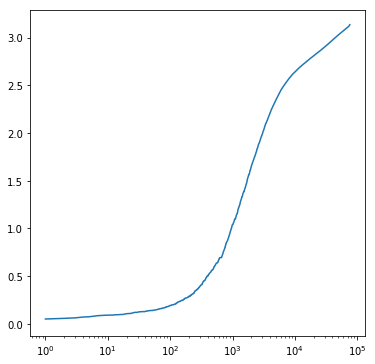

In [63]:
plt.rcParams['figure.figsize'] = (6, 6)


df.sort_values(by="entropyUsuarios", ascending=True, inplace=True)

plt.semilogx(range(df.shape[0]), df.entropyUsuarios);

Me parece que los datos son algo ruidosos así que uso menos.

In [91]:
from sklearn import decomposition

limite = 3* 10 ** 3


plt.rcParams['figure.figsize'] = (6, 6)

pca = decomposition.PCA(n_components=componentes)

X = df[:limite][columnas_usuarios].as_matrix()
print(X.shape)
pca.fit(X)


(3000, 23)


PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

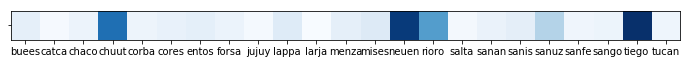

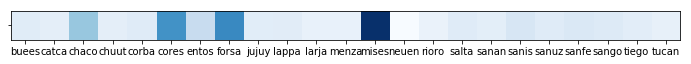

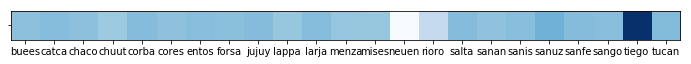

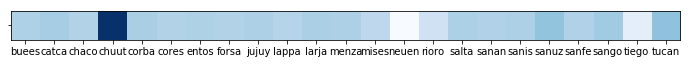

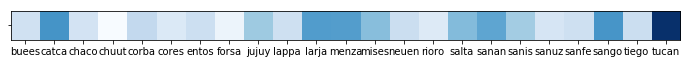

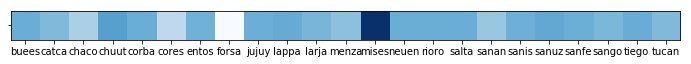

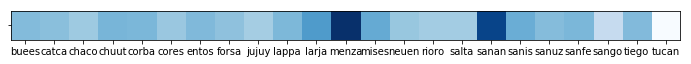

In [92]:
prov_labels = [x.split("U")[0] for x in columnas_usuarios]
prov_labels = [x[:3] + x[-2:] for x in prov_labels]

plt.rcParams['figure.figsize'] = (12, 15)
no_comp = len(pca.components_)

for i, component in enumerate(pca.components_):
    plt.subplot(no_comp, 1, i+1)
    
    plt.imshow(component.reshape(1, -1), cmap=plt.cm.Blues)
    plt.xticks(range(23), prov_labels)
    plt.yticks(range(1), [''])
    plt.show()
    

In [93]:
for i, component in enumerate(pca.components_):
    print("="*40)
    print("componente {}\n\n".format(i+1))
    x = pd.Series(component, index=prov_labels)
    
    print(x.sort_values(ascending=False))

componente 1


tiego    0.576467
neuen    0.552871
chuut    0.435603
rioro    0.329991
sanuz    0.178554
mises    0.074868
lappa    0.071851
sanis    0.057067
entos    0.054416
menza    0.052379
buees    0.051781
cores    0.043631
sanan    0.037481
forsa    0.035805
chaco    0.033268
sango    0.030637
corba    0.028763
tucan    0.027140
sanfe    0.024516
salta    0.012254
jujuy    0.009528
catca    0.006410
larja    0.001011
dtype: float64
componente 2


mises    0.735579
forsa    0.449515
cores    0.420014
chaco    0.220714
entos    0.095466
sanis    0.028290
sanfe    0.016567
sango    0.000916
sanuz   -0.004111
salta   -0.004168
corba   -0.004361
buees   -0.008036
lappa   -0.012032
jujuy   -0.015501
tiego   -0.017848
sanan   -0.021977
catca   -0.024420
chuut   -0.026038
tucan   -0.038334
larja   -0.040579
menza   -0.043981
rioro   -0.052765
neuen   -0.105505
dtype: float64
componente 3


tiego    0.761646
sanuz    0.072833
tucan    0.008761
jujuy    0.004351
sanfe    0.003555
salta  

1. Tierra del Fuego, Neuquén, Chubut, Río Negro, Santa Cruz
2. Misiones, Formosa, Corrientes, Chaco, un poco Entre Ríos. 
3. Tierra del Fuego, muy poco Santa Cruz. Muy negativa Neuquén. 
4. Chubut, Tucumán, Santa Cruz
5. Tucumán, Catamarca, Santiago, La Rioja, Mendoza, San Juan, Salta, San Luis, Misiones, Jujuy.
6. Misiones, negativa Formosa.
7. Mendoza, San Juan, La Rioja

